In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import json

Set font size for figures

In [2]:
FS = 60

Load connectivity matrices for p3 and p7 (for comparison)

In [3]:
# Get the connectivity matrices for both data sets (this is the easiest way to do it)
# p3
p3c_dict = loadmat('./data/connectivity_matrices/P3_Observed_PC_Connectivity_Synapse_Numbers_gteq_5_syns_gteq_40pc_PC_targets.mat')
p3a_dict = loadmat('./data/connectivity_matrices/P3_axon_IDs_for_Obs_PC_Conn_Syn_Nums_gteq_5_syns_gteq_40pc_PC_syns.mat')
p3p_dict = loadmat('./data/connectivity_matrices/P3_PC_IDs_for_Obs_PC_Conn_Syn_Nums_gteq_5_syns_gteq_40pc_PC_syns.mat')
p3c = p3c_dict['P3_PCconnectivity']
p3a = p3a_dict['P3_PCconn_axon_IDs']
p3p = p3p_dict['P3_PCconn_PC_IDs']
# p7
p7c_dict = loadmat('./data/connectivity_matrices/P7_Observed_PC_Connectivity_Synapse_Numbers_gteq_5_syns_gteq_70pc_PC_targets.mat')
p7a_dict = loadmat('./data/connectivity_matrices/P7_axon_IDs_for_Obs_PC_Conn_Syn_Nums_gteq_5_syns_gteq_70pc_PC_syns.mat')
p7p_dict = loadmat('./data/connectivity_matrices/P7_PC_IDs_for_Obs_PC_Conn_Syn_Nums_gteq_5_syns_gteq_70pc_PC_syns.mat')
p7c = p7c_dict['P7_PCconnectivity']
p7a = p7a_dict['P7_PCconn_axon_IDs']
p7p = p7p_dict['P7_PCconn_PC_IDs']

Import connectivity matrices from a convergent run and one from a non-convergent run

1) convergent run: $\gamma = 1.1, p_{rem} = 0.005$

2) non-convergent run: $\gamma = 0, p_{rem} = 0.05$

In [4]:
con_cm_fname = './data/p3_p7_evolve_results/190214_evolve_p3_p7_conn_mat_pr_0.005_g_1.1_ts_955.json'
noncon_cm_fname = './data/p3_p7_evolve_results/190214_evolve_p3_p7_conn_mat_pr_0.05_g_0_ts_955.json'

In [5]:
with open(con_cm_fname,'r') as f:
    ccm_dict = json.loads(f.read())
with open(noncon_cm_fname,'r') as f:
    nccm_dict = json.loads(f.read())

In [6]:
# Inspect keys
print(ccm_dict.keys())
print(nccm_dict.keys())

dict_keys(['conn_mat', 'row_labels', 'col_labels'])
dict_keys(['conn_mat', 'row_labels', 'col_labels'])


In [7]:
cc = np.asarray(ccm_dict['conn_mat'])
ca = ccm_dict['row_labels']
cp = ccm_dict['col_labels']

ncc = np.asarray(nccm_dict['conn_mat'])
nca = nccm_dict['row_labels']
ncp = nccm_dict['col_labels']

Plot connectivity matrices

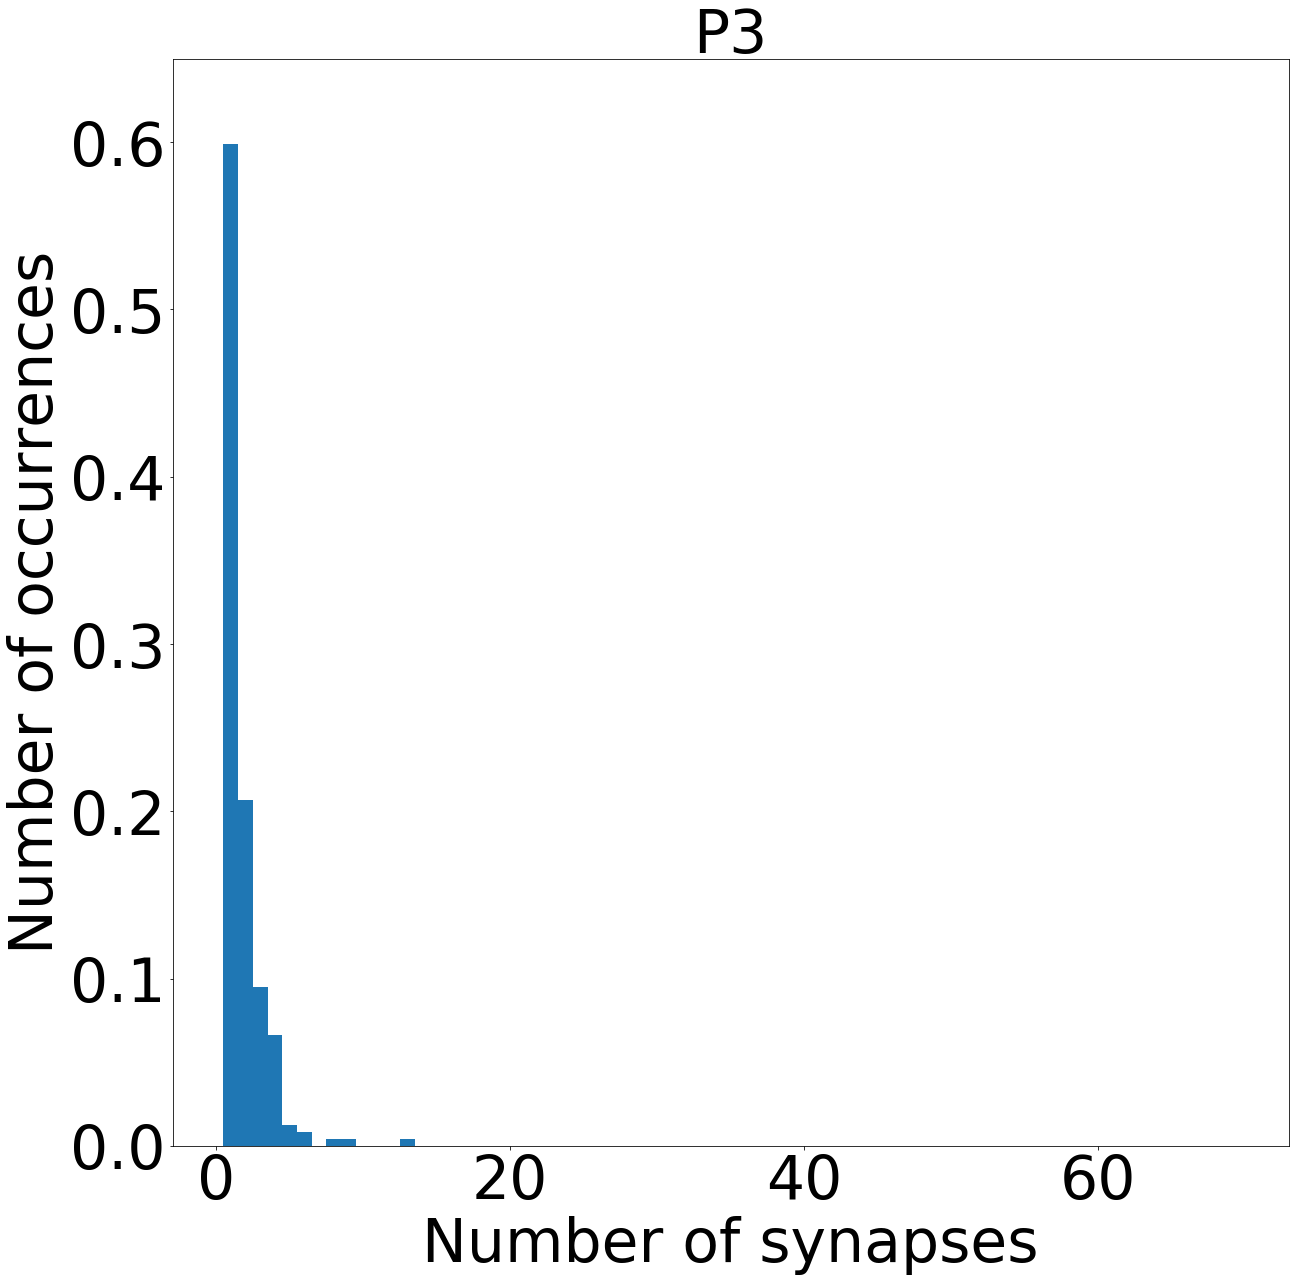

In [8]:
# p3
plt.figure(figsize=(20,20))
edges_pc_conn = np.arange(5,705,10)*0.1
p3cnz = [q for q in p3c.flatten() if q != 0]
hp3 = plt.hist(p3cnz,bins=edges_pc_conn,density=True)
# uxlim = 50
uylim = 0.65
# plt.xlim((0,uxlim))
plt.ylim((0,uylim))
plt.xlabel('Number of synapses',fontsize=FS) # formed by one cf branch onto one pc target
plt.ylabel('Number of occurrences',fontsize=FS)
plt.title('P3',fontsize=FS)
plt.tick_params(labelsize=FS)
fignametemp = './data/figures/p3_p7_evolve/p3_conn_dist.png'
# plt.show()
plt.savefig(fignametemp)

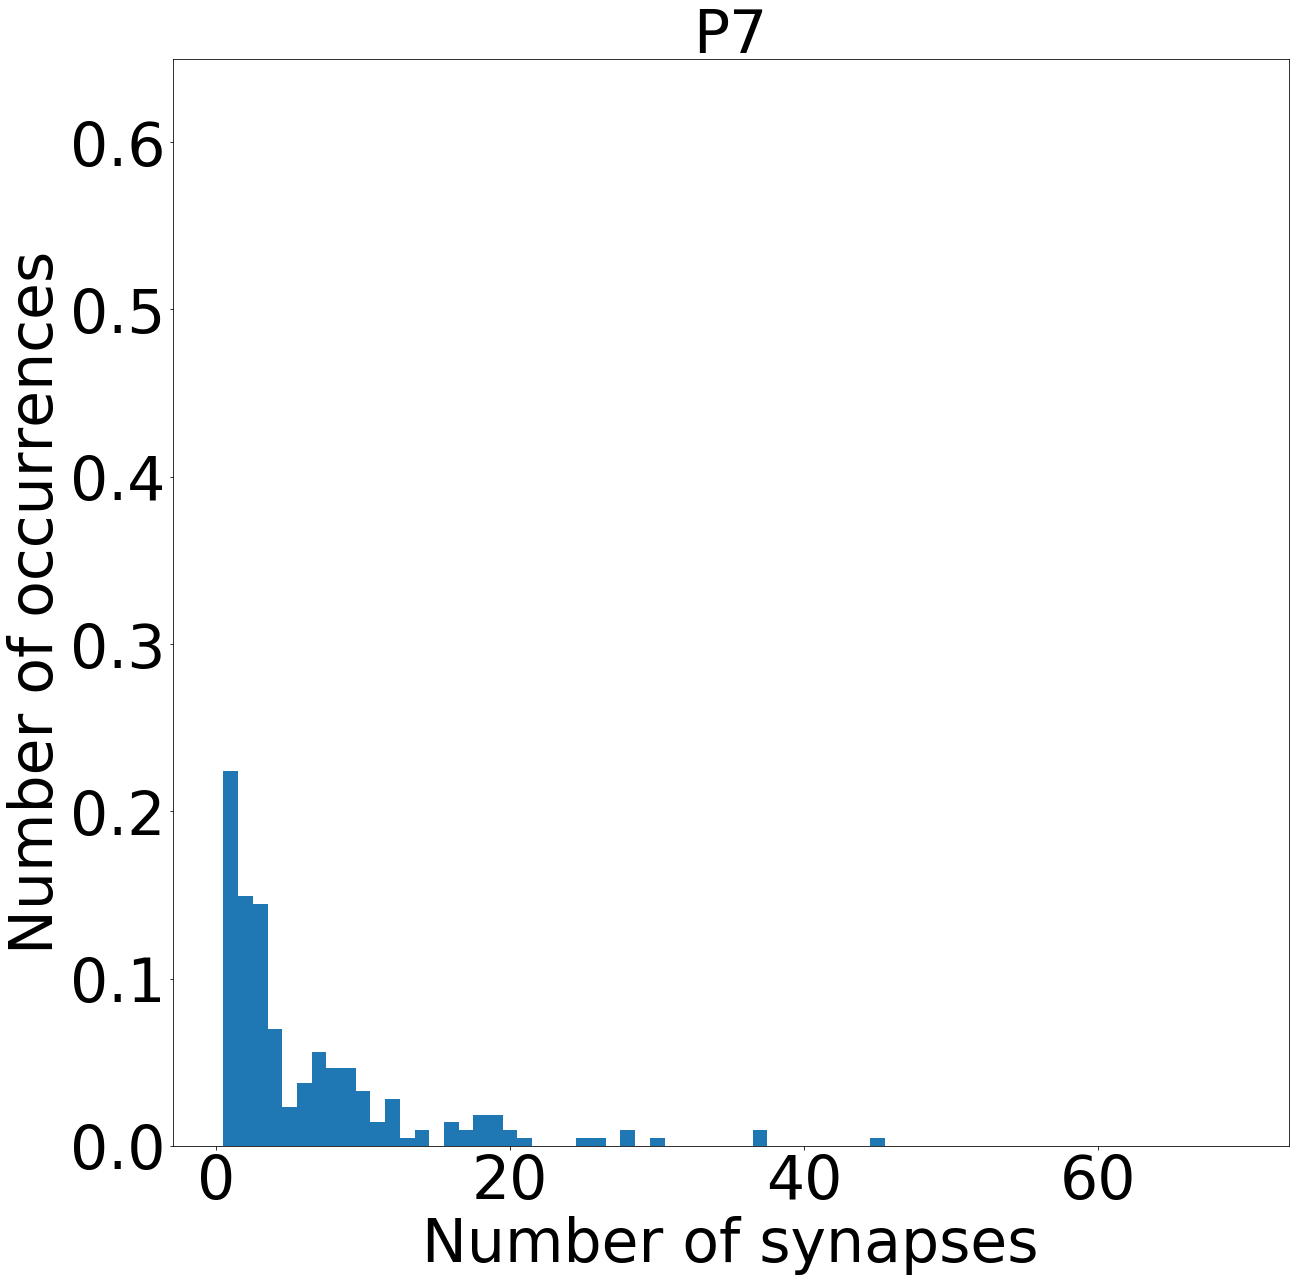

In [9]:
# p7
plt.figure(figsize=(20,20))
p7cnz = [q for q in p7c.flatten() if q != 0]
hp7 = plt.hist(p7cnz,bins=edges_pc_conn,density=True)
uylim2 = 0.4
# plt.xlim((0,uxlim))
plt.ylim((0,uylim))
plt.xlabel('Number of synapses',fontsize=FS) # formed by one cf branch onto one pc target
plt.ylabel('Number of occurrences',fontsize=FS)
plt.title('P7',fontsize=FS)
plt.tick_params(labelsize=FS)
fignametemp = './data/figures/p3_p7_evolve/p7_conn_dist.png'
# plt.show()
plt.savefig(fignametemp)

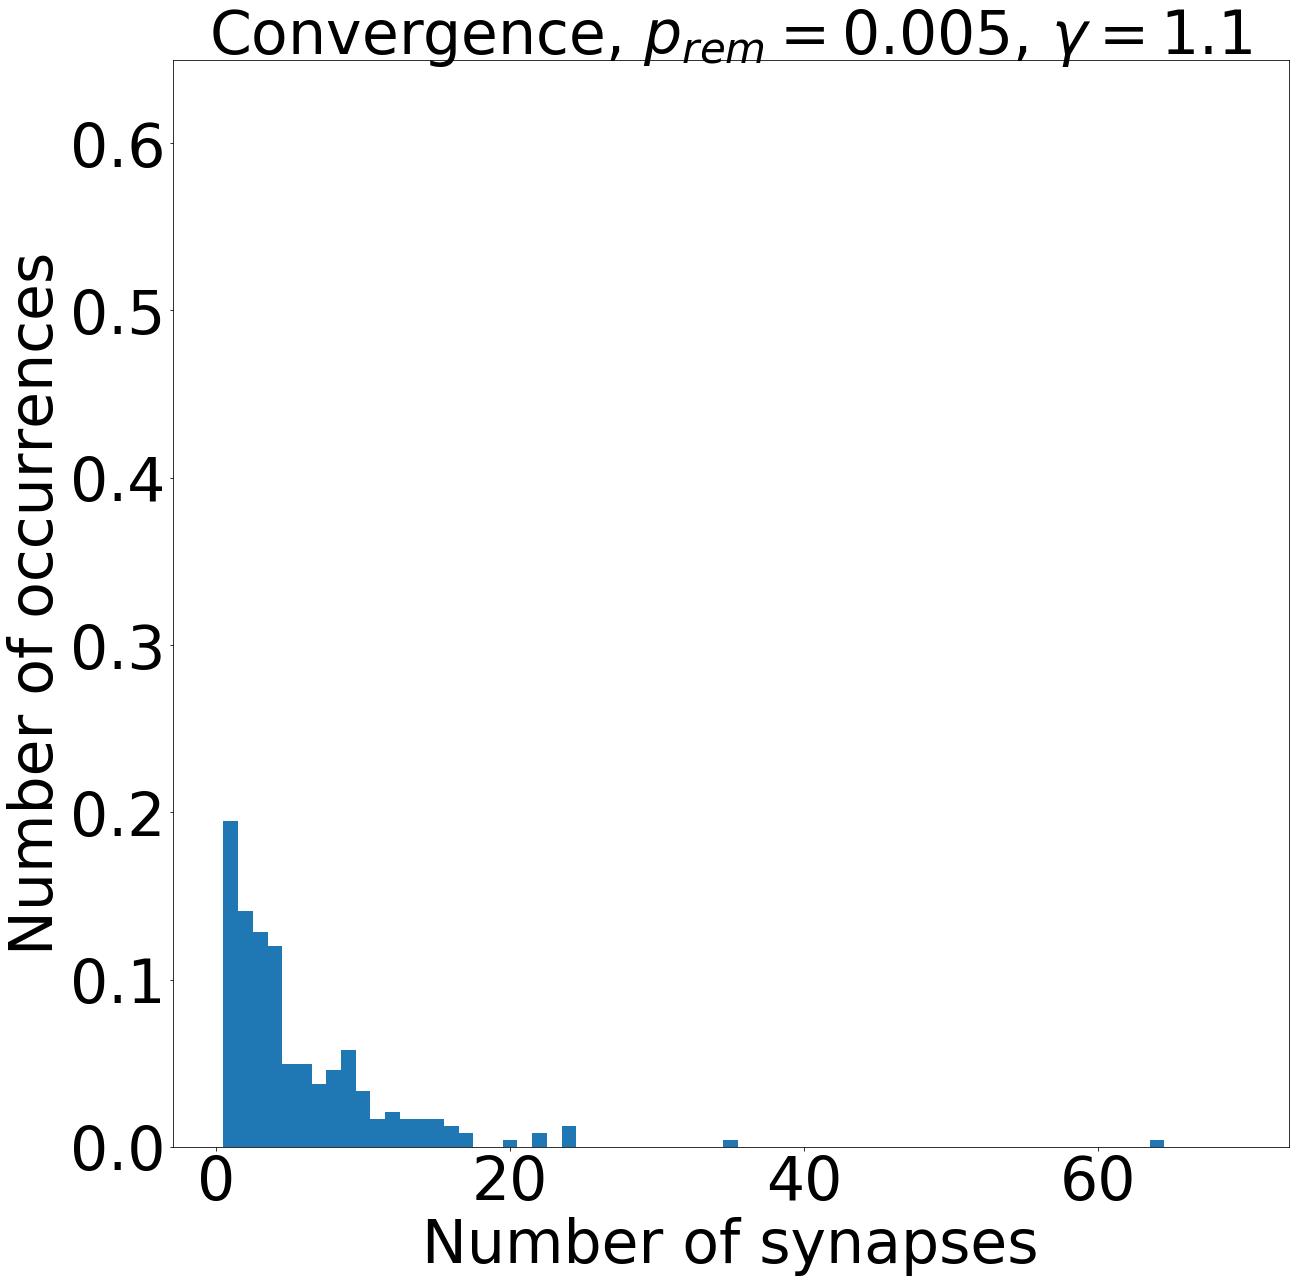

In [10]:
# convergent connectivity matrix
plt.figure(figsize=(20,20))
ccnz = [q for q in cc.flatten() if q != 0]
hc = plt.hist(ccnz,bins=edges_pc_conn,density=True)
# plt.xlim((0,uxlim))
plt.ylim((0,uylim))
plt.xlabel('Number of synapses',fontsize=FS) # formed by one cf branch onto one pc target
plt.ylabel('Number of occurrences',fontsize=FS)
plt.title('Convergence, $p_{rem} = 0.005$, $\gamma = 1.1$',fontsize=FS)
plt.tick_params(labelsize=FS)
fignametemp = './data/figures/p3_p7_evolve/c_conn_dist.png'
# plt.show()
plt.savefig(fignametemp)

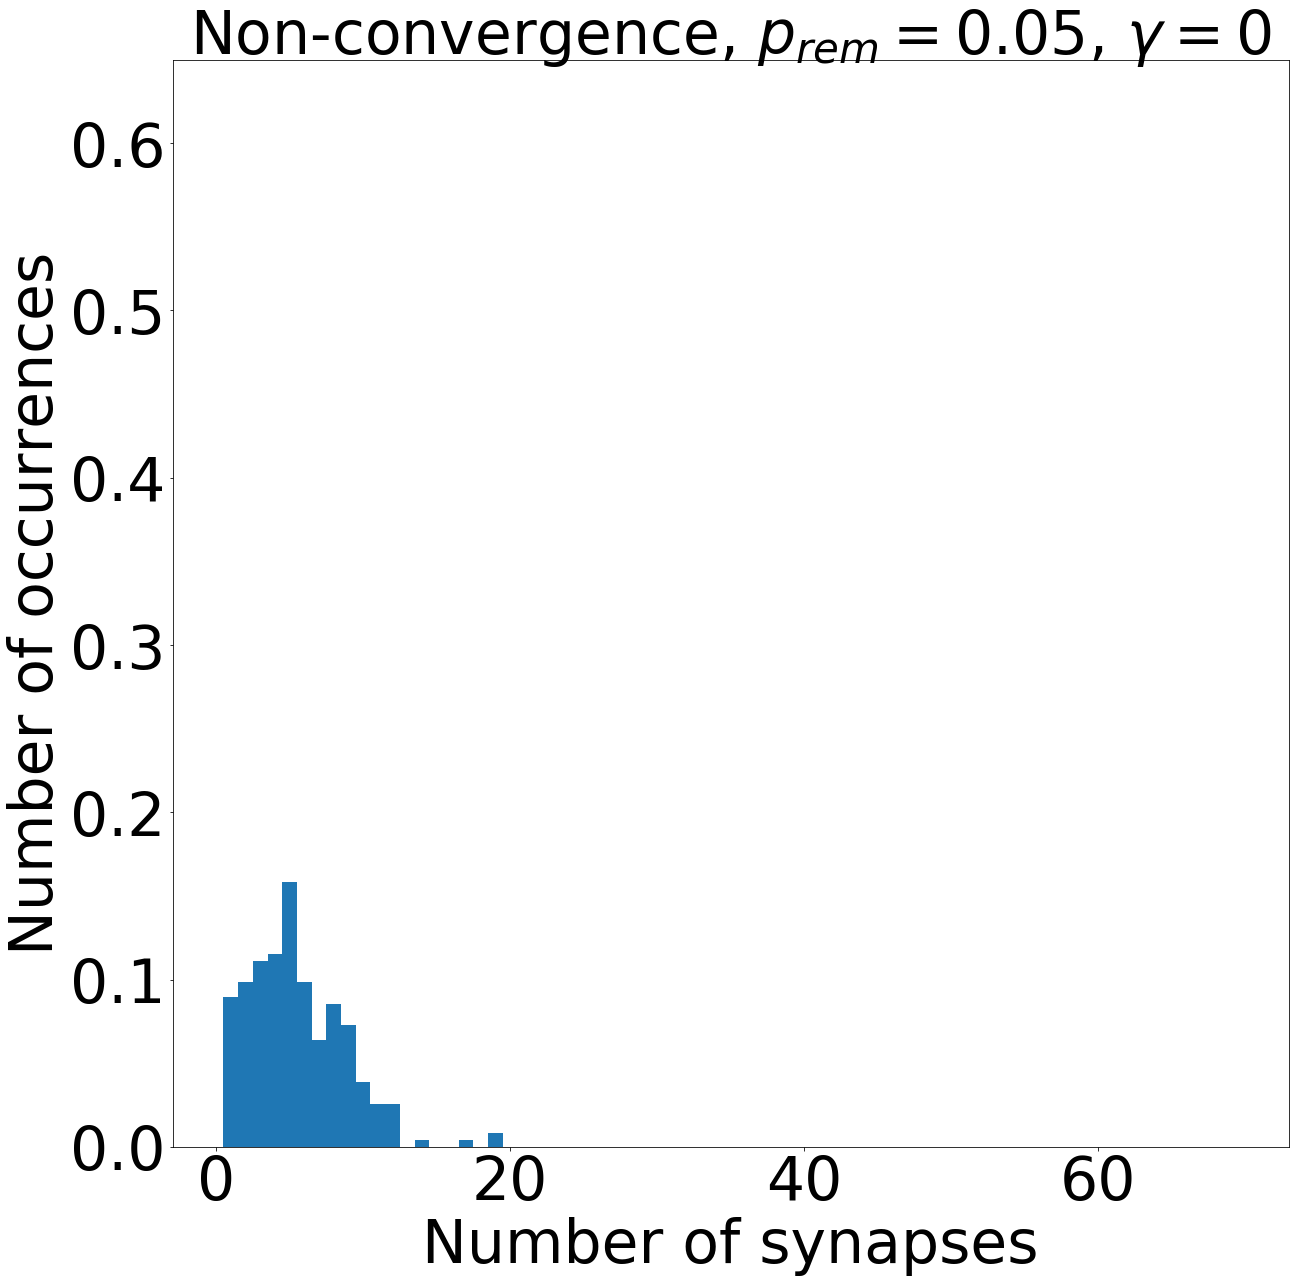

In [11]:
# nonconvergent connectivity matrix
plt.figure(figsize=(20,20))
nccnz = [q for q in ncc.flatten() if q != 0]
hnc = plt.hist(nccnz,bins=edges_pc_conn,density=True)
# plt.xlim((0,uxlim))
plt.ylim((0,uylim))
plt.xlabel('Number of synapses',fontsize=FS) # formed by one cf branch onto one pc target
plt.ylabel('Number of occurrences',fontsize=FS)
plt.title('Non-convergence, $p_{rem} = 0.05$, $\gamma = 0$',fontsize=FS)
plt.tick_params(labelsize=FS)
fignametemp = './data/figures/p3_p7_evolve/nc_conn_dist.png'
# plt.show()
plt.savefig(fignametemp)